# **Task 2 : Movie Rating Prediction**
The goal of the project is to build a model that predicts the rating of the movie.

In [2]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


We can see that top movie was Anjaam from year 2019 of 120 min and gener was Drama with 8 votes.

# Data Preprocessing

We need to understand the data in depth.

In [7]:
def data_in_details(df,message):
  print(f'{message}:\n')
  print("Rows:",df.shape[0])
  print("\nNumber of features:" , df.shape[1])
  print("\nFeatures:")
  print(df.columns.tolist())
  print("\nMissing values:",df.isnull().sum().values.sum())
  print("\nUnique values:")
  print(df.nunique())

In [8]:
data_in_details(df,'Have a look in data')

Have a look in data:

Rows: 15509

Number of features: 10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 33523

Unique values:
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


# Exploratory Data Analysis

In [9]:
#checking for missing values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [12]:
df['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [13]:
df['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [14]:
df['Actor 2'].value_counts()

Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: Actor 2, Length: 4891, dtype: int64

In [15]:
df['Actor 3'].value_counts()


Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: Actor 3, Length: 4820, dtype: int64

In [16]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


Since it has a lot of data missing so it can lead to wrong prediction and can miss lead us , so we need to remove the null values.

In [17]:
df.dropna(subset=['Name','Year','Duration','Votes','Rating','Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3'],inplace = True)
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
data_in_details(df,'Have a look in data')

Have a look in data:

Rows: 5659

Number of features: 10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values: 0

Unique values:
Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64


In [19]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


We need to clean the data you can see in year above you can find it is written under () and then votes columns numbers have , and then duration has min in it so we need to remove this.

In [20]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [21]:
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

In [22]:
df['Duration'] = df['Duration'].str.replace('min','').astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [25]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [27]:
df.shape

(5659, 10)

Now we have 5659 rows with 10 columns with 0 missing values.

# Plotting

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['darkmagenta']

In [29]:
fig_year = px.histogram(df, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year')
fig_year.show()

In [30]:
fig_duration = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration')
fig_duration.show()

In [31]:
fig_rating = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating')
fig_rating.show()

<Axes: xlabel='Votes'>

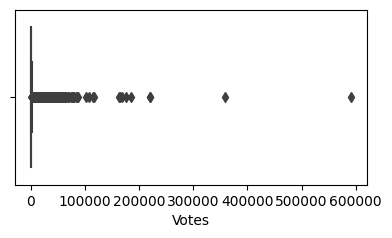

In [32]:

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=df)




*   we can see that we have most of the movies in 2015-2019

*   we can also see that ratings of the movie is of 6.8 -7.2



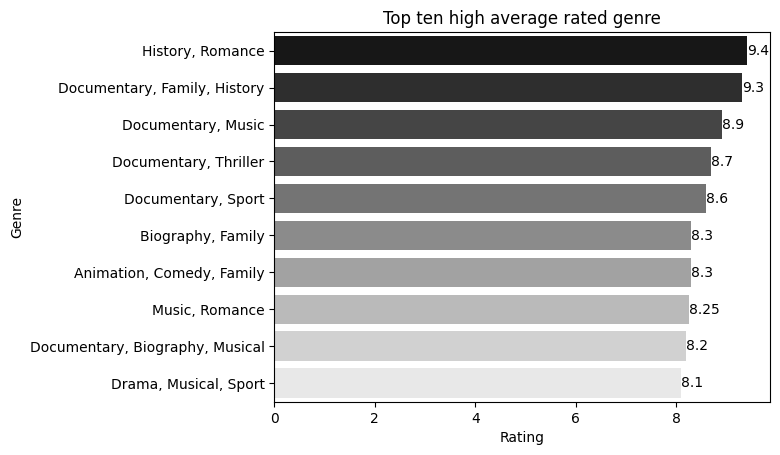

In [33]:
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

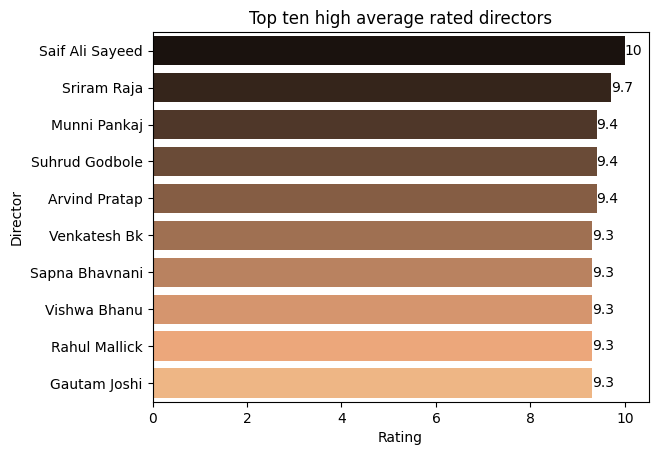

In [34]:
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='copper')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

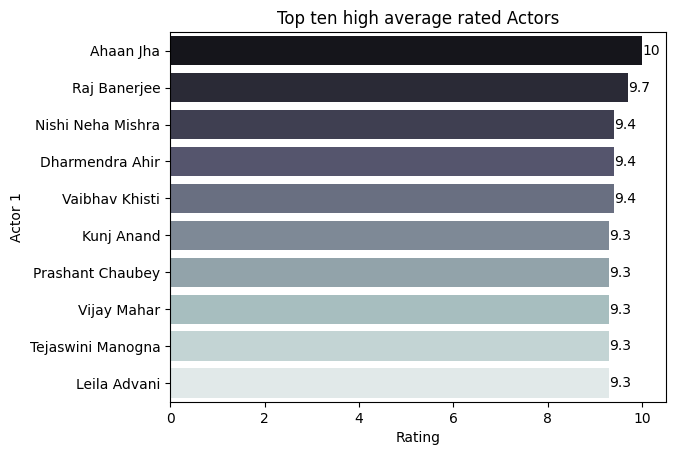

In [35]:
actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1', palette='bone')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated Actors')
plt.show()

In [36]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Duration,Rating,Votes
Year,1.000000,-0.327567,-0.204642,0.129749
Duration,-0.327567,1.000000,0.001839,0.097621
Rating,-0.204642,0.001839,1.000000,0.142563
Votes,0.129749,0.097621,0.142563,1.000000


<ipython-input-37-9360b0fe3b85>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



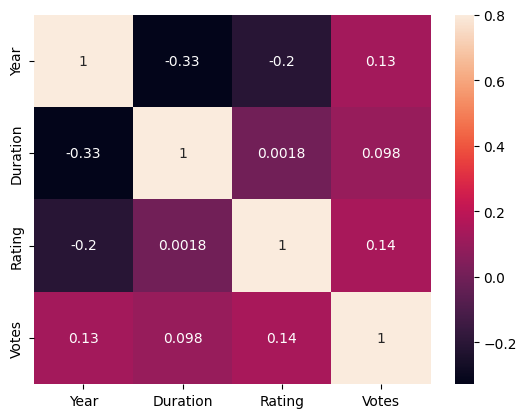

In [37]:
sns.heatmap(df.corr(),annot=True,vmax=.8)
plt.show()

In [38]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Data Preprocessing

In [39]:
df.drop(['Name'], axis=1,inplace=True)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Dividing data into independent and dependent varaible

In [40]:
X =df[['Year','Duration','Votes']]#dependent varaibles
y =df['Rating']

In [41]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [42]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [43]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [44]:
X_train.shape #80% of data

(4527, 8)

In [45]:
X_test.shape #20% of data

(1132, 8)

In [46]:
#feature scaling for avoiding outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Model BUilding**

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [53]:
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))


The performance evaluation of Linear Regression is below:  

Mean squared error:  0.40991170941671534
Mean absolute error:  0.46417138854396117
R2 score:  0.7869539495302685


We didnt get a good accuracy in linear regression lets try with another model.

# Decision Tree and Random forest Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state =42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20,random_state =55)

In [57]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_pred = rf.predict(X_test)

In [58]:
rf_pred

array([5.802, 6.708, 6.975, ..., 3.445, 4.722, 5.956])

In [59]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.3489480971731448
Mean absolute error:  0.40609187279151937
R2 score:  0.8186389600154343


# Model Testing

Now we will test the model on the random basis like we will provide the input.

In [60]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82,5.477778,5.600000,5.600000,5.883333,5.600000


In [61]:
df = pd.DataFrame(np.array([2019,	35,	110,	2.56,	5.400000,	5,4.400,4.450]).reshape(1,-1),columns=['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded'])

In [62]:
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating)

Predicted Rating: [9.683]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



# **Conclusions :**


*   We can see that top movie was Anjaam from year 2019 of 120 min and gener was Drama with 8 votes.

*   We needed to clean the data due to lot of missing values.
*   we can see that we have most of the movies in 2015-2019


*   The top high avearge rated genres are (History, Romance), (Documentary, History, Family) and (Documentary, Music).

*  The top high avearge rated directors are Saif Ali Sayeed, Sriram Raja and Bobby Kumar.
*   The top high avearge rated actors are Ahaan jha, Raj Banerjee and Dharmendra Ahir.
*   we can also see that ratings of the movie is of 6.8 -7.2

*   The highest Duration of movies ranges from 130-139 min.

*   We used two models Linear regression with a R2_score as 0.78 and Random forest Regression with R2_score as 0.81 which shows random forest is best .
*   When we gave our input we got the predicted value as Predicted Rating: [9.6].



